# Presets

This notebook illustrates how to use the [presets](https://pypi.python.org/pypi/presets) package to globally override the default parameter settings of `librosa`.

`Presets` lets you specify default parameter values by a global dictionary interface.  Note that this interface is tied to the variable name, and not to any particular function, so some care must be taken not to override variable names that mean different things in different functions.

In [1]:
from __future__ import print_function

In [2]:
# Note the _ prefix: we use this to alias the unmodified module
import librosa as _librosa

from presets import Preset

# The Preset object wraps a module (and its submodules) with a dictionary interface
librosa = Preset(_librosa)

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# We can now change some default settings via the dictionary

# Use 44.1KHz as the default sampling rate
librosa['sr'] = 44100

# Change the FFT parameters
librosa['n_fft'] = 4096
librosa['hop_length'] = librosa['n_fft'] // 4

In [5]:
y, sr = librosa.load(librosa.util.example_audio_file())

In [6]:
print(sr)

44100


Voila! The default sampling rate works.

In [7]:
S = librosa.stft(y)

In [8]:
print(S.shape)

(2049, 2647)


In [9]:
print(librosa.get_duration(S=S), librosa.get_duration(y=y, sr=sr))

61.44 61.45886621315193


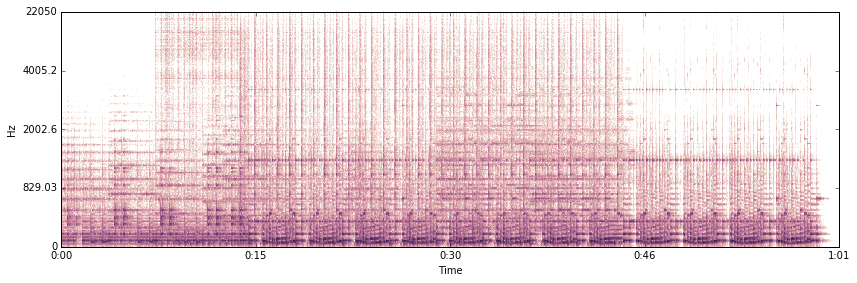

In [10]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max), x_axis='time', y_axis='log')
plt.tight_layout();

In [11]:
# Presets can be explicitly overridden just like any other default value:

S = librosa.stft(y, hop_length=2048)

In [12]:
print(S.shape)

(2049, 1324)


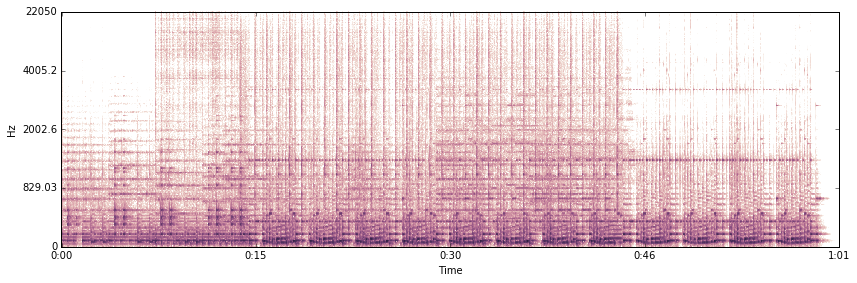

In [13]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max), x_axis='time', hop_length=2048, y_axis='log')
plt.tight_layout();